# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

##### Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

1. [Импорт библиотек](#step1)


2. [Часть 1. Приоритизация гипотез](#step2)

  2.1. [Расчет приоритизации (использование методики ICE)](#step2.1)
  
  2.2. [Расчет приоритизации (использование методики RICE)](#step2.2)
  

3. [Часть 2. Анализ A/B-теста](#step3)

  3.1. [График кумулятивной выручки по группам](#step3.1)
  
  3.2. [График кумулятивного среднего чека по группам](#step3.2)
  
  3.3. [График относительного изменения кумулятивного среднего чека группы B к группе A](#step3.3)
  
  3.4. [График кумулятивной конверсии по группам](#step3.4)
  
  3.5. [График относительного изменения кумулятивной конверсии группы B к группе A](#step3.5)
  
  3.6. [График количества заказов по пользователям](#step3.6)
  
  3.7. [95-й и 99-й перцентили количества заказов на пользователя. Границу для определения аномальных заказов](#step3.7)
  
  3.8. [График стоимостей заказов](#step3.8)
  
  3.9. [95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов](#step3.9)
  
  3.10. [Статистическая значимость различий в конверсии между группами по «сырым» данным](#step3.10)
  
  3.11. [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#step3.11)
  
  3.12. [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#step3.12)
  
  3.13. [Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#step3.13)
  
  3.14. [Решение по результатам теста](#step3.14)
  

4. [Вывод](#step3.15)


  



## Импорт бибилотек <a id="step1"></a>  
#### Посмотрим общие данные

In [100]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

Прочитаем файлы

In [101]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visits = pd.read_csv('/datasets/visitors.csv')

In [102]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [103]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В hypothesis 9 гипотез. Все коэффициенты находятся в диапазоне от 1 до 10, кроме Confidence он от 1 до 9. 

In [104]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [105]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [106]:
#Cмотрим сколько пользователей в группе А
print(len(orders[orders['group']=='A']))

557


In [107]:
#Cмотрим сколько пользователей в группе В
print(len(orders[orders['group']=='B']))

640


In [108]:
#Смотрис сколько пользователей имеют заказы в обеих группах
ab=orders.pivot_table(index = 'visitorId', columns = 'group', values='transactionId', aggfunc='count')\
                                                                        .reset_index().query('A == A and B == B')
print(len(ab))

58


In [109]:
#Смотрим число заказов находящихся одновременно в двух группах
print(ab['A'].sum()+ab['B'].sum())

181.0


В таблице orders было 1197 заказов в обеих группах, из них 181 заказ был одновременно и в А и в В.
Их необходимо удалить, т.к. их наличие пагубно повлияет на проведение А/В теста

In [110]:
orders_bad = ab['visitorId'].to_list()
orders_new = orders.query('visitorId not in @orders_bad')
print(len(orders_new))

1016


После удаления в таблице осталось 1016 заказов

In [111]:
visits

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [112]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [113]:
print(len(visits[visits['group']=='A']))

31


In [114]:
print(len(visits[visits['group']=='B']))

31


В таблице visits 62 записи, поровну разделенные между группами А и В

# Часть 1. Приоритизация гипотез.<a id="step2"></a>  



### Расчет приоритизации (использование методики ICE): <a id="step2.1"></a>  

In [115]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2)
hypothesis = hypothesis.sort_values(by='ICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Расчет приоритизации (использование методики RICE):<a id="step2.2"></a>  

In [116]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis = hypothesis.sort_values(by='RICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


# Часть 2. Анализ A/B-теста<a id="step3"></a>  

#### 1.График кумулятивной выручки по группам.<a id="step3.1"></a>  

In [117]:
#Функция для графиков
def plot(df,title,ylabel):
    plt.figure(figsize=(15,5))
    ax=sns.lineplot(data=df)
    ax.set_title(title)
    ax.set(xlabel='Дата',ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()

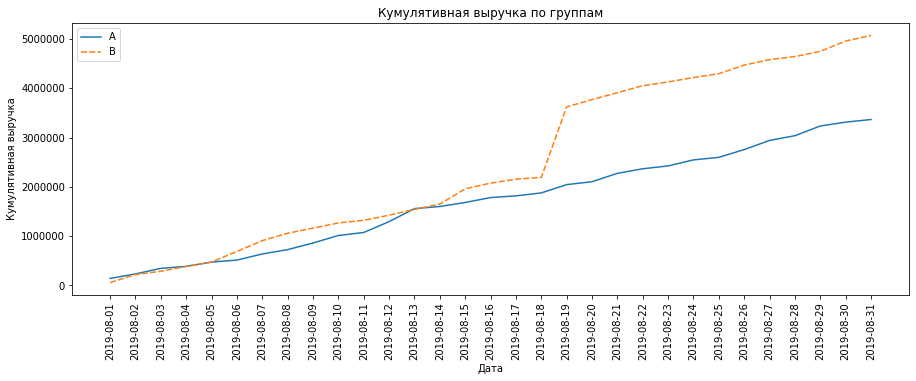

In [118]:
orders_revenue = orders_new.pivot_table(index = 'date', columns = 'group', values = 'revenue', aggfunc = 'sum').cumsum()

plot(orders_revenue, title = 'Кумулятивная выручка по группам',  ylabel='Кумулятивная выручка')

#### 2.График кумулятивного среднего чека по группам.<a id="step3.2"></a>  

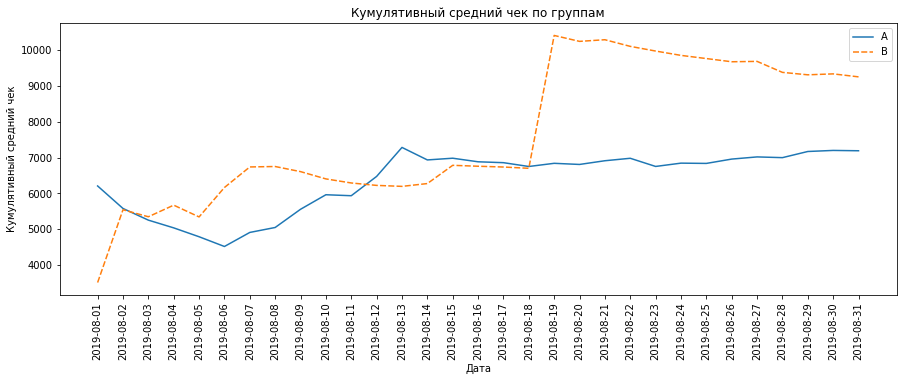

In [119]:
orders_new2 = orders_new.pivot_table(index = 'date', columns = 'group', values = 'transactionId', aggfunc = 'count').cumsum()

orders_avg = pd.DataFrame()
orders_avg['A'] = orders_revenue['A']/orders_new2['A']
orders_avg['B'] = orders_revenue['B']/orders_new2['B']

plot(orders_avg, title = 'Кумулятивный средний чек по группам',  ylabel='Кумулятивный средний чек')

В обеих группах средний чек сильно прыгал до 15го августа, затем стабилизировался и 19го августа произошел резкий скачок среднего чека у группы В. Такаяже картина как и на предыдущем графике

#### 3.График относительного изменения кумулятивного среднего чека группы B к группе A. <a id="step3.3"></a>  

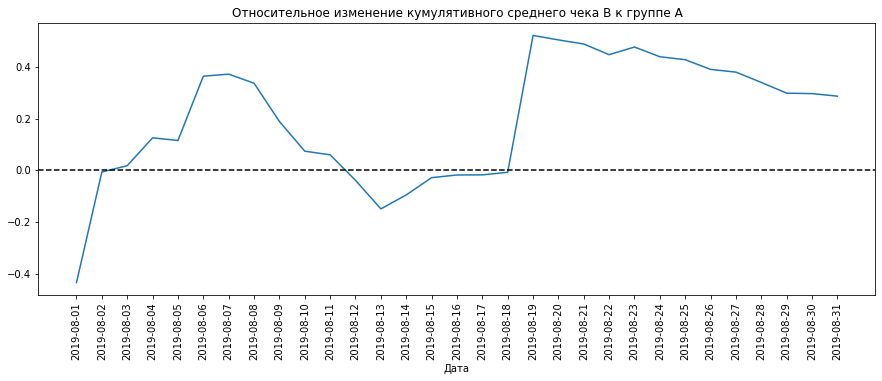

In [120]:
orders_avg['delta'] = orders_avg['B']/orders_avg['A']-1

plt.figure(figsize=(15,5))
ax=sns.lineplot(data=orders_avg['delta'])
ax.set_title('Относительное изменение кумулятивного среднего чека B к группе A')
ax.set(xlabel='Дата',ylabel='')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

####  4.График кумулятивной конверсии по группам.<a id="step3.4"></a>  

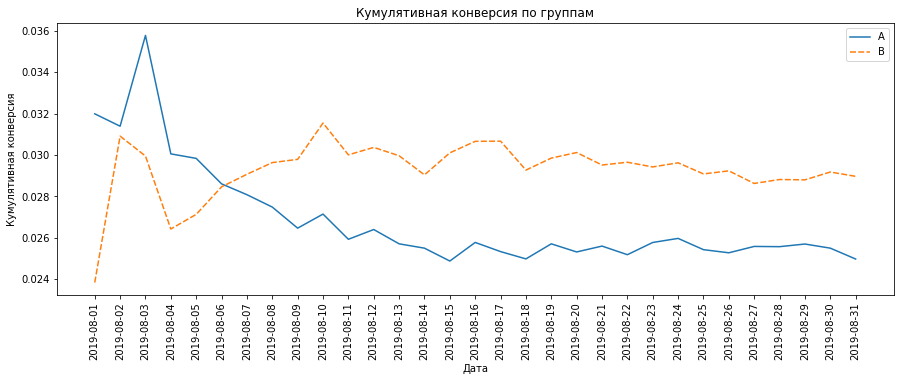

In [121]:
visits_new = visits.pivot_table(index = 'date', columns='group', values='visitors', aggfunc='sum').cumsum()

conversion = pd.DataFrame()
conversion['A'] = orders_new2['A']/visits_new['A']
conversion['B'] = orders_new2['B']/visits_new['B']

plot(conversion, title = 'Кумулятивная конверсия по группам',  ylabel='Кумулятивная конверсия')

C 6го августа в группе B конверсия в районе 3%, а в A в районе 2.5%

#### 5.График относительного изменения кумулятивной конверсии группы B к группе A<a id="step3.5"></a>  

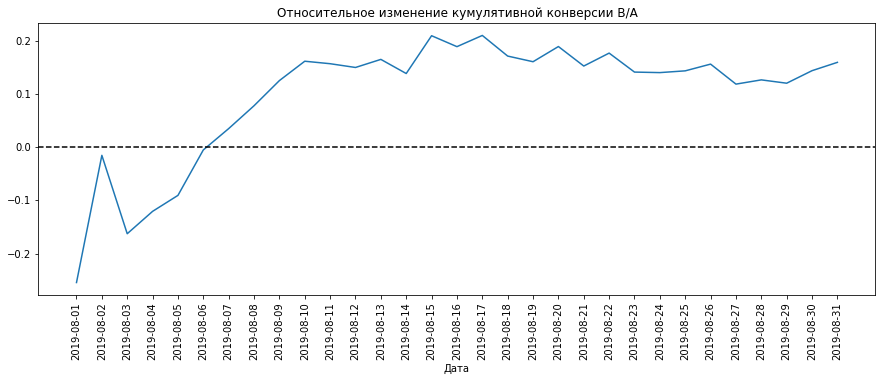

In [122]:
conversion['delta'] = conversion['B']/conversion['A']-1

plt.figure(figsize=(15,5))
ax=sns.lineplot(data=conversion['delta'])
ax.set_title('Относительное изменение кумулятивной конверсии B/A')
ax.set(xlabel='Дата',ylabel='')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#### 6.График количества заказов по пользователям.<a id="step3.6"></a>  

In [123]:
orders_by_users = orders_new.groupby('visitorId').agg(orders_count = ('transactionId', 'count'))

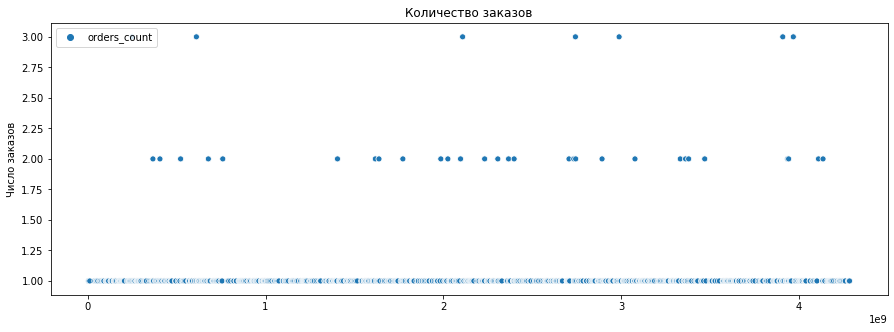

In [124]:
plt.figure(figsize = (15, 5))
ax = sns.scatterplot(data=orders_by_users)
ax.set_title('Количество заказов')
ax.set(xlabel='', ylabel='Число заказов')
plt.show()

Большинство пользователей совершают только одну покупку. Реже делают две покупки, еще реже 3

#### 7.95-й и 99-й перцентили количества заказов на пользователя. Границу для определения аномальных заказов. <a id="step3.7"></a>  

In [125]:
print(np.percentile(orders_by_users['orders_count'], [95, 99]))

[1. 2.]


95% пользователей совершают всего одну покупку. 99% пользователей сделали не более 2х покупок.

#### 8.График стоимостей заказов <a id="step3.8"></a>  

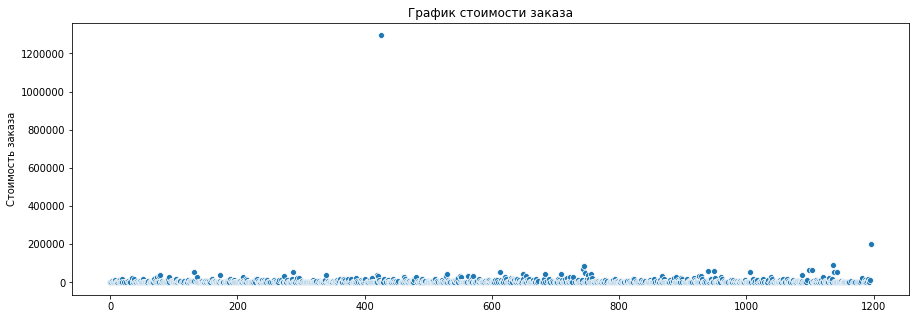

In [126]:
plt.figure(figsize = (15, 5))
ax = sns.scatterplot(data=orders_new['revenue'])
ax.set_title('График стоимости заказа')
ax.set(xlabel='', ylabel='Стоимость заказа')
plt.show()

In [127]:
#Заказы больше чем на 100 тысяч
print(orders_new.query('revenue > 100000'))

      transactionId   visitorId        date  revenue group
425   590470918      1920142716  2019-08-19  1294500  B   
1196  3936777065     2108080724  2019-08-15  202740   B   


#### 9.95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов. <a id="step3.9"></a>  

In [128]:
print(np.percentile(orders_new['revenue'], [95, 99]))

[26785. 53904.]


#### 10.Статистическая значимость различий в конверсии между группами по «сырым» данным. <a id="step3.10"></a>  

In [129]:
#Проверка критерием Манна-Уитни.
orders_by_visitorId = orders_new.groupby('visitorId').agg(n_orders = ('transactionId', 'count'), group = ('group', 'first'))

#Объявим переменные sampleA, sampleВ, в них находятся списки с количеством заказов и нули для пользователей, 
#которые ничего не заказывали

sampleA = pd.concat([orders_by_visitorId.query('group == "A"')['n_orders'],pd.Series(0, index=np.arange(
    visits.query('group == "A"')['visitors'].sum() 
 - len(orders_by_visitorId.query('group == "A"'))), name='n_orders')],axis=0)

sampleB = pd.concat([orders_by_visitorId.query('group == "B"')['n_orders'],pd.Series(0, index=np.arange(
    visits.query('group == "B"')['visitors'].sum() 
 - len(orders_by_visitorId.query('group == "B"'))), name='n_orders')],axis=0)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
conversionA = len(orders_new.query('group=="A"'))/visits.query('group=="A"')['visitors'].sum()
conversionB = len(orders_new.query('group=="B"'))/visits.query('group=="B"')['visitors'].sum()
print("Различие в конверсии B/A: {0:.3f}".format( conversionB/conversionA - 1))

p-value: 0.006
Различие в конверсии B/A: 0.160


#### 11.Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. <a id="step3.11"></a>  

In [130]:
print("p-value:{0:.3f}".format(st.mannwhitneyu(orders_new[orders_new['group']=='A']['revenue'], orders_new[orders_new['group']=='B']['revenue'])[1]))
print("отличие среднего чека B/A:{0:.3f}".format(orders_new[orders_new['group']=='B']['revenue'].mean()/orders_new[orders_new['group']=='A']['revenue'].mean()-1))

p-value:0.415
отличие среднего чека B/A:0.287


Разница в среднем чеке 28%, p-value больше 0.05 - критического значения значимости - не отвергаем нулевую гипотезу о равенстве среднего чека

#### 12.Статистическая значимость различий в конверсии между группами по «очищенным» данным. <a id="step3.12"></a>  

In [131]:
#Удалим аномальных пользователей 
orders_by_users = orders_new.groupby('visitorId').agg(count_orders = ('transactionId', 'count')).reset_index()

usersWithManyOrders = orders_by_users.query('count_orders > 2')['visitorId'] #на основании 99го персентиля из пункта 7
usersWithExpensiveOrders = orders_new.query('revenue > 26785')['visitorId']  #на основании 95го персентиля из пункта 10

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().to_list()

orders_without_abnormal = orders_new.query('visitorId not in @abnormalUsers')

print('Количество заказов после удаления выбросов:', len(orders_without_abnormal))

Количество заказов после удаления выбросов: 943


In [132]:
#Посчитаем статистическуя значимость 
orders_by_visitorId1 = orders_without_abnormal.groupby('visitorId').agg(n_orders = ('transactionId', 'count'), group = ('group', 'first'))

sampleA = pd.concat([orders_by_visitorId.query('group == "A"')['n_orders'],pd.Series(0, index=np.arange(
    visits.query('group == "A"')['visitors'].sum() 
 - len(orders_by_visitorId.query('group == "A"'))), name='n_orders')],axis=0)

sampleB = pd.concat([orders_by_visitorId.query('group == "B"')['n_orders'],pd.Series(0, index=np.arange(
    visits.query('group == "B"')['visitors'].sum() 
 - len(orders_by_visitorId.query('group == "B"'))), name='n_orders')],axis=0)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
conversionA = len(orders_without_abnormal.query('group=="A"'))/visits.query('group=="A"')['visitors'].sum()
conversionB = len(orders_without_abnormal.query('group=="B"'))/visits.query('group=="B"')['visitors'].sum()
print("Различие в конверсии B/A: {0:.3f}".format( conversionB/conversionA - 1))

p-value: 0.006
Различие в конверсии B/A: 0.182


После удаления выбросов осталось 943 заказа.
p-значение равно 0.006, оно остается меньше уровня критического значения значимости, поэтому:
Отвергаем нулевую гипотезу о равенстве средней конверсии: между группами и в очищенных данных есть значимая разница
Различие в конверсии  увеличилось до 18%

#### 13.Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. <a id="step3.13"></a>  

In [133]:
print("p-value:{0:.3f}".format(st.mannwhitneyu(orders_without_abnormal[orders_without_abnormal['group']=='A']['revenue'], 
                                               orders_without_abnormal[orders_without_abnormal['group']=='B']['revenue'])[1]))
print("отличие среднего чека B/A:{0:.3f}".format(orders_without_abnormal[orders_without_abnormal['group']=='B']['revenue'].mean()/
                                                orders_without_abnormal[orders_without_abnormal['group']=='A']['revenue'].mean()-1))

p-value:0.323
отличие среднего чека B/A:-0.048


#### 14.Решение по результатам теста <a id="step3.14"></a>  

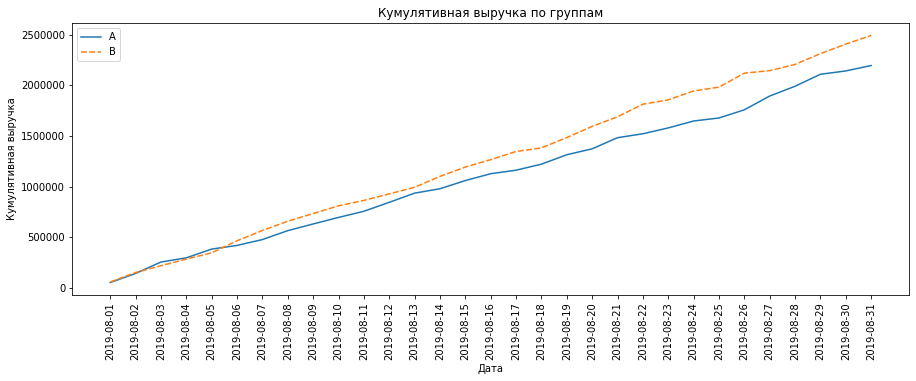

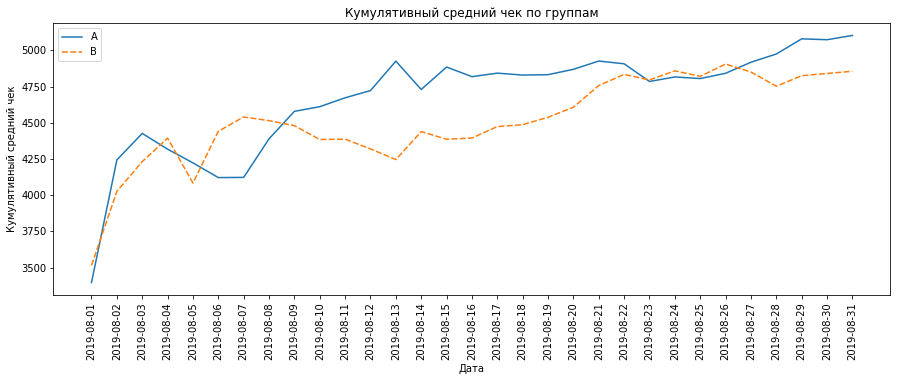

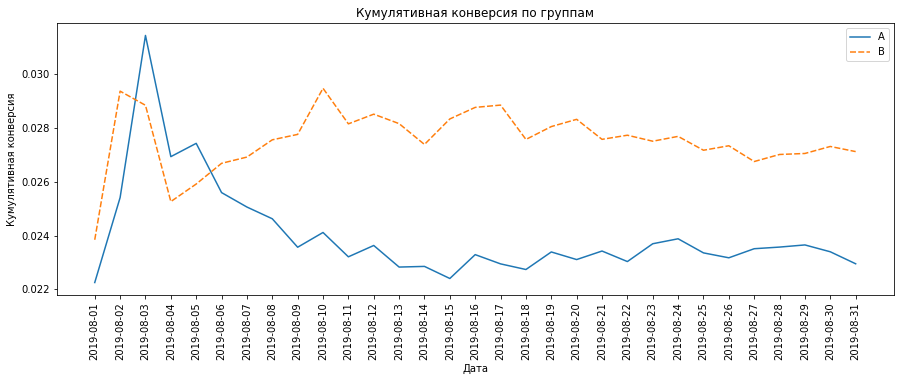

In [134]:
#Посторим графики по чистым данным
orders_revenue_new = orders_without_abnormal.pivot_table(index = 'date', columns = 'group', values = 'revenue', aggfunc = 'sum').cumsum()

plot(orders_revenue_new, title = 'Кумулятивная выручка по группам',  ylabel='Кумулятивная выручка')

orders_new3 = orders_without_abnormal.pivot_table(index = 'date', columns = 'group', 
                                                   values = 'transactionId', aggfunc = 'count').cumsum()

orders_avg_new = pd.DataFrame()
orders_avg_new['A'] = orders_revenue_new['A']/orders_new3['A']
orders_avg_new['B'] = orders_revenue_new['B']/orders_new3['B']

plot(orders_avg_new, title = 'Кумулятивный средний чек по группам',  ylabel='Кумулятивный средний чек')

visits_new2 = visits.pivot_table(index = 'date', columns='group', values='visitors', aggfunc='sum').cumsum()

conversion_new = pd.DataFrame()
conversion_new['A'] = orders_new3['A']/visits_new2['A']
conversion_new['B'] = orders_new3['B']/visits_new2['B']

plot(conversion_new, title = 'Кумулятивная конверсия по группам',  ylabel='Кумулятивная конверсия')

### Вывод <a id="step4"></a>  

Изначальнотаблице orders было 1197 заказов в обеих группах, из них 181 заказ был одновременно и в А и в В. Их необходимо было удалить, т.к. их наличие пагубно повлияет на проведение А/В теста


В группе B есть несколько заказов, которые явно выбиваются из обычного размера и сильно влияют на результат эксперимента.
Для чистоты эксперимента, выбрали пользователей не более чем с 2 заказами и чеком не более 26785 . 
Итоговый размер выборки - 943 заказа.

В результате анализы можно сказать: гипотезу о различии среднего чека нельзя отвергнуть, а по конверсии группа B имеет лучшие результаты.
Кумулятивные графики конверсии и среднего чека стабилизировались, больших колебаний на них нет.

Эксперимент можно останавливать и сделать вывод, что группа B выгоднее.